#Final Capstone

Importing important libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import matplotlib.pyplot as plt
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

Reading from the link using pd.read_html

In [4]:
datahtml = pd.read_html('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo')
datahtml[3].head()

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


In [5]:
data=datahtml[3]

In [6]:
data.shape

(24, 8)

Cleaning The Data

In [7]:
data.drop(['No.','Flag','Kanji'],axis=1,inplace=True)

In [8]:
data.shape

(24, 5)

In [9]:
data.drop([23],inplace=True)

In [10]:
data.shape

(23, 5)

In [11]:
data.head()

,Name,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


Renaming the columns

In [12]:
data.columns=(['name', 'population', 'density', 'area','major_districts'])

In [13]:
data.head()

,name,population,density,area,major_districts
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


Using geocoder to get the coordinates

In [14]:
geolocator = Nominatim(user_agent="tokyoexp")

latitude=[]
longitude=[]

for i in range (data.shape[0]):
  location = geolocator.geocode(data['name'][i])
  latitude.append(location.latitude)
  longitude.append(location.longitude)
  print((location.latitude,location.longitude))


(35.6938097, 139.7532163)
(35.666255, 139.775565)
(35.6432274, 139.7400553)
(35.6937632, 139.7036319)
(35.71881, 139.744732)
(35.71745, 139.790859)
(35.700429, 139.805017)
(35.649154, 139.81279)
(35.599252, 139.73891)
(35.62125, 139.688014)
(35.561206, 139.715843)
(35.646096, 139.65627)
(35.6645956, 139.6987107)
(35.718123, 139.664468)
(35.6994929, 139.6362876)
(35.736156, 139.714222)
(-0.2201641, -78.5123274)
(35.737529, 139.78131)
(35.774143, 139.681209)
(35.74836, 139.638735)
(35.783703, 139.795319)
(35.751733, 139.863816)
(35.678278, 139.871091)


Adding coordinates to the dataframe

In [15]:
data['latitude']=latitude
data['longitude']=longitude

In [16]:
data

,name,population,density,area,major_districts,latitude,longitude
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732
5,Taitō,200486,19830,10.11,"Ueno, Asakusa",35.717450,139.790859
6,Sumida,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku",35.700429,139.805017
7,Kōtō,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",35.649154,139.812790
8,Shinagawa,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",35.599252,139.738910
9,Meguro,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",35.621250,139.688014


Correcting wrong coordinates

In [17]:
for i in range(data.shape[0]):  
  if data.loc[i,'latitude']<35:
    district=data.loc[i,'major_districts'].split(',')[0]
    location = geolocator.geocode(district)
    data.loc[i,'latitude']=location.latitude
    data.loc[i,'longitude']=location.longitude


In [18]:
data

,name,population,density,area,major_districts,latitude,longitude
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732
5,Taitō,200486,19830,10.11,"Ueno, Asakusa",35.717450,139.790859
6,Sumida,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku",35.700429,139.805017
7,Kōtō,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",35.649154,139.812790
8,Shinagawa,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",35.599252,139.738910
9,Meguro,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",35.621250,139.688014


Introducing another column 'radius' to set the radius of circlemarker

In [19]:
div=data['density'].max()/13
data['radius']=data['density']/div
data.head()

,name,population,density,area,major_districts,latitude,longitude,radius
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216,2.927152
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565,8.299338
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,6.990728
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,10.686976
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732,11.358499


Getting the coordinates of tokyo

In [20]:
location = geolocator.geocode("tokyo")

Creating a map to visualize the population density in each ward

In [21]:

map_tokyo = folium.Map(location=[location.latitude, location.longitude], zoom_start=12,tiles = "CartoDB dark_matter")

# add markers to map
for lat, lng, label, radius in zip(data['latitude'], data['longitude'], data['major_districts'],data['radius']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=radius,
        popup=label,
        color='#E80018',
        fill=True,
        fill_color='#E80019',
        fill_opacity=0.2,
        parse_html=False).add_to(map_tokyo)  

map_tokyo

Foursquare Credentials and Version

In [22]:
CLIENT_ID = 'A0T24AQKVWQXIFPH1IKOZQBBY0DNHMMPZVJ0RTAUFADRCUOB' # your Foursquare ID
CLIENT_SECRET = 'YMCUVQMKYLQZE3NZ5Q5B30I5SDHKYHDYJNXGMSLG1N5NJGPQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


function that extracts the category of the venue

In [23]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

cfunction to clean the json and structure it into a pandas dataframe and return nearby benues of all the neighborhoods

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Storing neighbourhood data in a new dataframe

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
tokyo_venues = getNearbyVenues(names=data['major_districts'],
                                   latitudes=data['latitude'],
                                   longitudes=data['longitude']
                                  )



Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi, Akihabara, Yūrakuchō, Iidabashi, Kanda
Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōbori, Shinkawa, Tsukishima, Kachidoki, Tsukuda
Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppongi, Toranomon, Aoyama, Azabu
Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ichigaya, Yotsuya
Hongō, Yayoi, Hakusan
Ueno, Asakusa
Kinshichō, Morishita, Ryōgoku
Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi
Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi, Tennōzu
Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai
Ōmori, Kamata, Haneda, Den-en-chōfu
Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa
Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, Sendagaya, Yoyogi
Nakano
Kōenji, Asagaya, Ogikubo
Ikebukuro, Komagome, Senkawa, Sugamo
Akabane, Ōji, Tabata
Arakawa, Machiya, Nippori, Minamisenju
Itabashi, Takashimadaira
Nerima, Ōizumi, Hikarigaoka
Ayase, Kitasenju, Takenotsuka
Tateishi, Aoto, Kameari, Shibamata
Kasai, Koiwa


In [26]:
tokyo_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Shin Tou ki (秦唐記),35.696005,139.754159,Noodle House
1,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
2,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Shimizumon Gate (清水門),35.692685,139.752681,Historic Site
3,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Kitanomaru Park (北の丸公園),35.691653,139.751201,Park
4,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Nippon Budokan (日本武道館),35.693356,139.749865,Stadium


In [27]:
tokyo_venues.shape

(1094, 7)

In [28]:
tokyo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Akabane, Ōji, Tabata",100,100,100,100,100,100
"Arakawa, Machiya, Nippori, Minamisenju",33,33,33,33,33,33
"Ayase, Kitasenju, Takenotsuka",12,12,12,12,12,12
"Hongō, Yayoi, Hakusan",14,14,14,14,14,14
"Ikebukuro, Komagome, Senkawa, Sugamo",38,38,38,38,38,38
"Itabashi, Takashimadaira",22,22,22,22,22,22
"Kasai, Koiwa",17,17,17,17,17,17
"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi",30,30,30,30,30,30
"Kinshichō, Morishita, Ryōgoku",33,33,33,33,33,33


In [29]:
# one hot encoding
tokyo_onehot = pd.get_dummies(tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_onehot['Neighborhood'] = tokyo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

tokyo_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bridge,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Canal,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fish Market,Fishing Store,Flea Market,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Lake,Leather Goods Store,Library,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Park,Parking,Pastry Shop,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rest Area,Restaurant,Road,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
tokyo_onehot.shape

(1094, 197)

In [31]:
tokyo_grouped = tokyo_onehot.groupby('Neighborhood').mean().reset_index()

In [32]:
tokyo_grouped

,Neighborhood,ATM,Accessories Store,African Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Bridge,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Canal,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Fabric Shop,Fast Food Restaurant,Fish Market,Fishing Store,Flea Market,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Karaoke Box,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Lake,Leather Goods Store,Library,Liquor Store,Lounge,Market,Martial Arts Dojo,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Outdoor Supply Store,Park,Parking,Pastry Shop,Pet Café,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rest Area,Restaurant,Road,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Strip Club,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Takoyaki Place,Tea Room,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Tunnel,Udon Restaurant,Unagi Restaurant,Used Bookstore,Video Store,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,"Akabane, Ōji, Tabata",0.010000,0.00,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.01,0.010000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.0000,0.01,0.000000,0.00,0.010000,0.00,0.030000,0.000000,0.000000,0.000000,0.100000,0.00,0.000000,0.000000,0.00,0.010000,0.010000,0.020000,0.000000,0.010000,0.000000,0.01,0.000000,0.020000,0.000000,0.000000,0.00,0.010000,0.01,0.000000,0.00000,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.00,0.00,0.010000,0.020000,0.00,0.000000,0.000000,0.030000,0.020000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.010000,0.000000,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.170000,0.000000,0.000000,0.000000,0.00,0.030000,0.00,0.000000,0.

Analysis of venue data

In [33]:
num_top_venues = 3

for hood in tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tokyo_grouped[tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akabane, Ōji, Tabata----
               venue  freq
0           Sake Bar  0.17
1  Convenience Store  0.10
2   Ramen Restaurant  0.06


----Arakawa, Machiya, Nippori, Minamisenju----
               venue  freq
0   Ramen Restaurant  0.12
1  Convenience Store  0.12
2      Grocery Store  0.09


----Ayase, Kitasenju, Takenotsuka----
               venue  freq
0  Convenience Store  0.25
1        Supermarket  0.17
2         Restaurant  0.08


----Hongō, Yayoi, Hakusan----
                 venue  freq
0         Intersection  0.14
1  Szechuan Restaurant  0.07
2    Convenience Store  0.07


----Ikebukuro, Komagome, Senkawa, Sugamo----
                 venue  freq
0     Ramen Restaurant  0.13
1  Japanese Restaurant  0.05
2   Chinese Restaurant  0.05


----Itabashi, Takashimadaira----
               venue  freq
0  Convenience Store  0.18
1       Intersection  0.09
2               Park  0.09


----Kasai, Koiwa----
               venue  freq
0  Convenience Store  0.24
1      Grocery Store  0.12


function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

create a new dataframe and display the top 10 venues for each neighborhood.

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tokyo_grouped['Neighborhood']

for ind in np.arange(tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Akabane, Ōji, Tabata",Sake Bar,Convenience Store,Ramen Restaurant,Bar,BBQ Joint,Coffee Shop,Supermarket,Soba Restaurant,Shopping Mall,Italian Restaurant
1,"Arakawa, Machiya, Nippori, Minamisenju",Ramen Restaurant,Convenience Store,Park,Grocery Store,Chinese Restaurant,Noodle House,Pharmacy,Bus Stop,Café,Food & Drink Shop
2,"Ayase, Kitasenju, Takenotsuka",Convenience Store,Supermarket,Park,Japanese Restaurant,Sake Bar,Drugstore,Pharmacy,Restaurant,Italian Restaurant,Hotpot Restaurant
3,"Hongō, Yayoi, Hakusan",Intersection,Road,BBQ Joint,Museum,Café,Szechuan Restaurant,Botanical Garden,Grocery Store,Chinese Restaurant,Park
4,"Ikebukuro, Komagome, Senkawa, Sugamo",Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Convenience Store,Yoshoku Restaurant,Sake Bar,Rock Club,Recording Studio,Park,Music Store


##Clustering the Neighborhoods

Cluster the neighborhood in 3 clusters

In [36]:
# set number of clusters
kclusters = 3
tokyo_grouped_clustering = tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 0, 2, 0, 1, 0, 1, 2], dtype=int32)

creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = data

# merge tokyo_grouped with tokyo_data to add latitude/longitude for each neighborhood
tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='major_districts',how = 'right')

tokyo_merged.head() 

,name,population,density,area,major_districts,latitude,longitude,radius,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.693810,139.753216,2.927152,2,Chinese Restaurant,Ramen Restaurant,Coffee Shop,Café,Convenience Store,Sake Bar,Historic Site,Indian Restaurant,Sushi Restaurant,Japanese Curry Restaurant
1,Chūō,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565,8.299338,2,Sushi Restaurant,Japanese Restaurant,Convenience Store,Coffee Shop,Soba Restaurant,Donburi Restaurant,Bakery,Park,Italian Restaurant,Ramen Restaurant
2,Minato,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.643227,139.740055,6.990728,1,Convenience Store,Park,Soba Restaurant,Diner,Bakery,Discount Store,French Restaurant,Chinese Restaurant,Café,Music Venue
3,Shinjuku,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.693763,139.703632,10.686976,2,Bar,Sake Bar,Ramen Restaurant,BBQ Joint,Japanese Restaurant,Pub,Yakitori Restaurant,Dessert Shop,Chinese Restaurant,Thai Restaurant
4,Bunkyō,223389,19790,11.29,"Hongō, Yayoi, Hakusan",35.718810,139.744732,11.358499,0,Intersection,Road,BBQ Joint,Museum,Café,Szechuan Restaurant,Botanical Garden,Grocery Store,Chinese Restaurant,Park


visualize the resulting clusters

In [38]:
# create map
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=12,tiles = "CartoDB dark_matter")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, radius in zip(tokyo_merged['latitude'], tokyo_merged['longitude'], tokyo_merged['major_districts'], tokyo_merged['Cluster Labels'],tokyo_merged['radius']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)

    cls=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=radius,
        popup=label,
        color=rainbow[cls-1],
        fill=True,
        fill_color=rainbow[cls-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##Examining the Clusters

Function to get cluster data

In [39]:
def get_cluster(i):
  return tokyo_merged.loc[tokyo_merged['Cluster Labels'] == i-1, tokyo_merged.columns[[0,1,2,4] + list(range(9, tokyo_merged.shape[1]))]]

In [40]:
cluster1=get_cluster(1)
cluster1

,name,population,density,major_districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bunkyō,223389,19790,"Hongō, Yayoi, Hakusan",Intersection,Road,BBQ Joint,Museum,Café,Szechuan Restaurant,Botanical Garden,Grocery Store,Chinese Restaurant,Park
7,Kōtō,502579,12510,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",Intersection,Convenience Store,Bus Stop,Park,Metro Station,Restaurant,Dog Run,Supermarket,Café,Market
18,Itabashi,569225,17670,"Itabashi, Takashimadaira",Convenience Store,Intersection,Chinese Restaurant,Park,Grocery Store,BBQ Joint,Golf Driving Range,Supermarket,Bowling Alley,Hobby Shop
19,Nerima,726748,15120,"Nerima, Ōizumi, Hikarigaoka",Convenience Store,Intersection,Café,Karaoke Box,Bike Rental / Bike Share,Metro Station,Bakery,BBQ Joint,Pharmacy,Chinese Restaurant


In [41]:
cluster2=get_cluster(2)
cluster2

,name,population,density,major_districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Minato,248071,12180,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",Convenience Store,Park,Soba Restaurant,Diner,Bakery,Discount Store,French Restaurant,Chinese Restaurant,Café,Music Venue
6,Sumida,260358,18910,"Kinshichō, Morishita, Ryōgoku",Convenience Store,Sake Bar,Japanese Restaurant,BBQ Joint,Café,Playground,Tonkatsu Restaurant,Burger Joint,Chinese Restaurant,Noodle House
8,Shinagawa,392492,17180,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",Convenience Store,BBQ Joint,Bus Stop,Canal,Grocery Store,Shopping Mall,Park,Restaurant,Soba Restaurant,Sushi Restaurant
9,Meguro,280283,19110,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",Convenience Store,Bus Stop,Japanese Restaurant,Grocery Store,Coffee Shop,Chinese Restaurant,Italian Restaurant,Trail,Outdoor Supply Store,Men's Store
11,Setagaya,910868,15690,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",Convenience Store,Café,Sake Bar,Ramen Restaurant,Tram Station,Bakery,Pizza Place,Liquor Store,Bus Stop,Fast Food Restaurant
17,Arakawa,213648,21030,"Arakawa, Machiya, Nippori, Minamisenju",Ramen Restaurant,Convenience Store,Park,Grocery Store,Chinese Restaurant,Noodle House,Pharmacy,Bus Stop,Café,Food & Drink Shop
20,Adachi,674067,12660,"Ayase, Kitasenju, Takenotsuka",Convenience Store,Supermarket,Park,Japanese Restaurant,Sake Bar,Drugstore,Pharmacy,Restaurant,Italian Restaurant,Hotpot Restaurant
21,Katsushika,447140,12850,"Tateishi, Aoto, Kameari, Shibamata",Convenience Store,Train Station,Supermarket,Intersection,Park,Chinese Restaurant,Donburi Restaurant,ATM,Motel,Discount Store
22,Edogawa,685899,13750,"Kasai, Koiwa",Convenience Store,Grocery Store,Pharmacy,Supermarket,Deli / Bodega,Bath House,Park,Clothing Store,Playground,Noodle House


In [42]:
cluster3=get_cluster(3)
cluster3

,name,population,density,major_districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,59441,5100,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",Chinese Restaurant,Ramen Restaurant,Coffee Shop,Café,Convenience Store,Sake Bar,Historic Site,Indian Restaurant,Sushi Restaurant,Japanese Curry Restaurant
1,Chūō,147620,14460,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",Sushi Restaurant,Japanese Restaurant,Convenience Store,Coffee Shop,Soba Restaurant,Donburi Restaurant,Bakery,Park,Italian Restaurant,Ramen Restaurant
3,Shinjuku,339211,18620,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",Bar,Sake Bar,Ramen Restaurant,BBQ Joint,Japanese Restaurant,Pub,Yakitori Restaurant,Dessert Shop,Chinese Restaurant,Thai Restaurant
5,Taitō,200486,19830,"Ueno, Asakusa",Coffee Shop,Hotel,BBQ Joint,Hostel,Convenience Store,Japanese Restaurant,Café,Sushi Restaurant,Ramen Restaurant,Wagashi Place
10,Ōta,722608,11910,"Ōmori, Kamata, Haneda, Den-en-chōfu",Ramen Restaurant,Sake Bar,Japanese Restaurant,Chinese Restaurant,Sushi Restaurant,Café,Tonkatsu Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Italian Restaurant
12,Shibuya,227850,15080,"Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, S...",Café,Record Shop,Rock Club,Nightclub,BBQ Joint,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Clothing Store,Concert Hall
13,Nakano,332902,21350,Nakano,Ramen Restaurant,Convenience Store,Chinese Restaurant,Italian Restaurant,Grocery Store,BBQ Joint,Park,Café,Pizza Place,Sake Bar
14,Suginami,570483,16750,"Kōenji, Asagaya, Ogikubo",Café,Italian Restaurant,Shopping Mall,Grocery Store,Ramen Restaurant,Sake Bar,Indie Theater,Bus Stop,Chinese Restaurant,Music Venue
15,Toshima,294673,22650,"Ikebukuro, Komagome, Senkawa, Sugamo",Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Convenience Store,Yoshoku Restaurant,Sake Bar,Rock Club,Recording Studio,Park,Music Store
16,Kita,345063,16740,"Akabane, Ōji, Tabata",Sake Bar,Convenience Store,Ramen Restaurant,Bar,BBQ Joint,Coffee Shop,Supermarket,Soba Restaurant,Shopping Mall,Italian Restaurant


Function to get the number of food industries and number of people per food industry

In [43]:
def no_of_restaurants(clusterx):
  number=0
  clusterx.index=np.arange(clusterx.shape[0]).tolist()
  clusterx.columns=np.arange(clusterx.shape[1]).tolist()
  
  for i in range(clusterx.shape[0]):  
    for j in range(3,clusterx.shape[1]):  
      split=clusterx.loc[i,j].split(' ')
      if ('Restaurant' in split) or ('Sake' in split) or ('Coffee' in split) or ('Bakery' in split) or ('Diner' in split):
        number+=1
  rpp=clusterx[1].sum()/number
  return number,rpp



In [44]:
r1,rpp1=no_of_restaurants(cluster1)
r2,rpp2=no_of_restaurants(cluster2)
r3,rpp3=no_of_restaurants(cluster3)

###Plotting the result

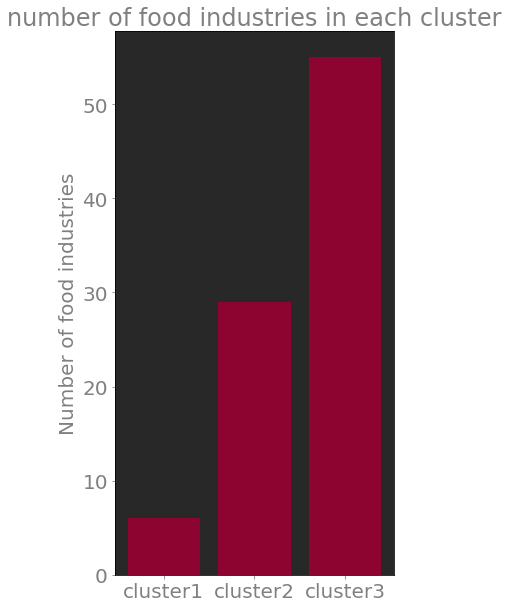

In [80]:
plt.rcParams['axes.facecolor'] = '#282828'
plt.rcParams['text.color'] = 'grey'
plt.rcParams['font.size'] = 20
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams['figure.figsize'] = 5, 10
objects = ('cluster1','cluster2','cluster3')
y_pos = np.arange(len(objects))
numbers = [r1,r2,r3]

plt.bar(y_pos, numbers, align='center', alpha=0.9,color='#990033',)
plt.xticks(y_pos, objects)
plt.ylabel('Number of food industries')
plt.title('number of food industries in each cluster')

plt.show()

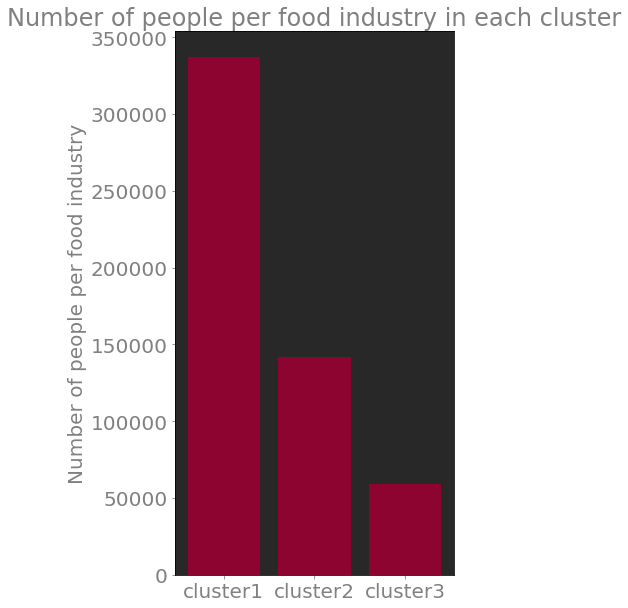

In [81]:
plt.rcParams['axes.facecolor'] = '#282828'
plt.rcParams['text.color'] = 'grey'
plt.rcParams['font.size'] = 20
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams['figure.figsize'] = 5, 10
objects = ('cluster1','cluster2','cluster3')
y_pos = np.arange(len(objects))
numbers = [rpp1,rpp2,rpp3]

plt.bar(y_pos, numbers, align='center', alpha=0.9,color='#990033',)
plt.xticks(y_pos, objects)
plt.ylabel('Number of people per food industry')
plt.title('Number of people per food industry in each cluster')

plt.show()

In [66]:
#4d4b7105d754a06374d81259
def getNearbyrestaurants(category,names, latitudes, longitudes, radius=4000):
    
    venues_list=[]
    v=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_rest = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_rest.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_rest)

In [67]:
cat_rest="4d4b7105d754a06374d81259"

restaurants_data=getNearbyrestaurants(cat_rest,names=data['major_districts'],
                                   latitudes=data['latitude'],
                                   longitudes=data['longitude']
                                  )


Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi, Akihabara, Yūrakuchō, Iidabashi, Kanda
Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōbori, Shinkawa, Tsukishima, Kachidoki, Tsukuda
Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppongi, Toranomon, Aoyama, Azabu
Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ichigaya, Yotsuya
Hongō, Yayoi, Hakusan
Ueno, Asakusa
Kinshichō, Morishita, Ryōgoku
Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō, Fukagawa, Kiyosumi, Shirakawa, Etchūjima, Sunamachi, Aomi
Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi, Tennōzu
Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai
Ōmori, Kamata, Haneda, Den-en-chōfu
Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa
Shibuya, Ebisu, Harajuku, Daikanyama, Hiroo, Sendagaya, Yoyogi
Nakano
Kōenji, Asagaya, Ogikubo
Ikebukuro, Komagome, Senkawa, Sugamo
Akabane, Ōji, Tabata
Arakawa, Machiya, Nippori, Minamisenju
Itabashi, Takashimadaira
Nerima, Ōizumi, Hikarigaoka
Ayase, Kitasenju, Takenotsuka
Tateishi, Aoto, Kameari, Shibamata
Kasai, Koiwa


In [68]:
restaurants_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
1,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Rice Curry Manten (ライスカレーまんてん),35.698213,139.757428,Japanese Curry Restaurant
2,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Jimbocho Shokuniku Center (神保町食肉センター),35.697206,139.757284,BBQ Joint
3,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Saboru (さぼうる),35.695552,139.758648,Café
4,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.69381,139.753216,Maruka (丸香),35.696693,139.760121,Udon Restaurant


In [69]:
restaurants_data.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [86]:
restaurants_data.shape

(2300, 7)

In [70]:

coord=restaurants_data[['Venue Latitude', 'Venue Longitude']].values.tolist()


In [118]:
from folium.plugins import HeatMap
map_rest = folium.Map(location=[location.latitude, location.longitude], zoom_start=12)
folium.TileLayer('cartodb dark_matter').add_to(map_rest)
HeatMap(coord,min_opacity=0.2, max_val=0.7,radius=10,gradient={0.1:'orange ',0.5:'#A00000 '}).add_to(map_rest)
map_rest

In [128]:
map_rest.save('heatmap.png')

In [129]:
map_clusters.save('Cluster.png')

In [130]:
map_tokyo.save('tokyo.png')